In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [2]:
# データのロード
train_data = pd.read_csv("data_quiz_27.csv")
X = train_data.iloc[:, :-1] # Series型
y = train_data.iloc[:,  -1] # Series型

# DataFrameの概要を表示<Scaling前>
print(X.describe())

         1.25664    2.04978   -6.23640    4.71926   -4.26931    0.20590
count  99.000000  99.000000  99.000000  99.000000  99.000000  99.000000
mean   -0.089752  -0.203918   0.405997   1.742838  -0.126844   0.007772
std     5.586746   1.731785   4.962721   8.199997   3.173058   0.183090
min   -12.398240  -5.280250 -11.235910 -23.820240  -6.865330  -0.634440
25%    -3.883645  -1.231585  -2.804575  -3.403360  -2.706135  -0.100850
50%    -0.073080  -0.307420  -0.058030   0.671150  -0.069380  -0.001630
75%     4.164630   1.001980   3.883250   6.970300   2.180805   0.116995
max    13.374540   4.301200  11.946500  22.880080   7.351290   0.523280


In [3]:
# スケーリング・オブジェクトの作成
scaler = StandardScaler()

# X を 変換 : Fit the standardization parameters and scale the data.
X_scaled = scaler.fit_transform(X) # ndarray型

# DataFrameの概要を表示<Scaling後>
df_X_scaled = pd.DataFrame(data=X_scaled) # Series型
print(df_X_scaled.describe()) # mean=0.0などに変換されている

                  0             1             2             3             4  \
count  9.900000e+01  9.900000e+01  9.900000e+01  9.900000e+01  9.900000e+01   
mean   2.074659e-17 -1.121437e-17  7.121127e-17  1.121437e-17 -4.710037e-17   
std    1.005089e+00  1.005089e+00  1.005089e+00  1.005089e+00  1.005089e+00   
min   -2.214371e+00 -2.946189e+00 -2.357810e+00 -3.133315e+00 -2.134464e+00   
25%   -6.825441e-01 -5.964349e-01 -6.502302e-01 -6.307792e-01 -8.170091e-01   
50%    2.999342e-03 -6.007030e-02 -9.397845e-02 -1.313588e-01  1.820215e-02   
75%    7.653887e-01  6.998760e-01  7.042404e-01  6.407399e-01  7.309646e-01   
max    2.422307e+00  2.614669e+00  2.337273e+00  2.590832e+00  2.368753e+00   

                  5  
count  9.900000e+01  
mean  -1.794300e-17  
std    1.005089e+00  
min   -3.525481e+00  
25%   -5.962918e-01  
50%   -5.161488e-02  
75%    5.995874e-01  
max    2.829925e+00  


In [4]:
# インスタンスの作成
lasso_reg = Lasso()

# 最適化
lasso_reg.fit(X_scaled,y)
y_pred = lasso_reg.predict(X_scaled)

# 係数の取得
reg_coef = lasso_reg.coef_
print(reg_coef)

[  0.           3.8596924    9.05021225  -0.         -11.72692976
   0.41040086]


Blue = Original_Data
Red  = Prediction_Data


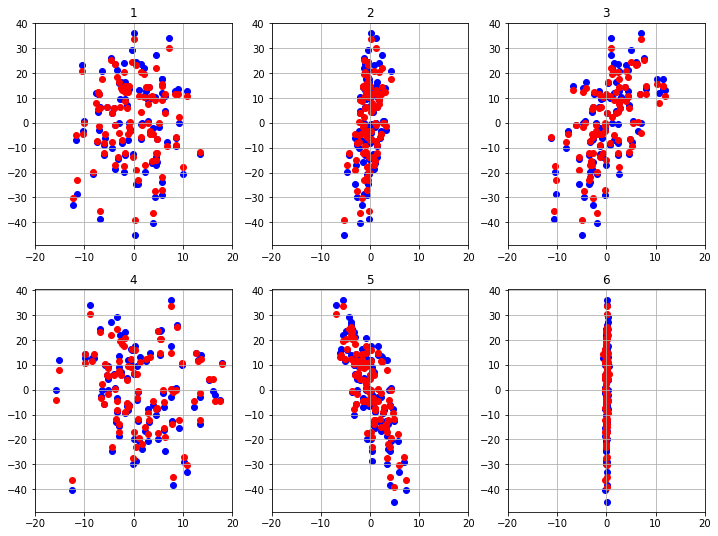

In [7]:
# プロット
plt.rcParams['figure.figsize'] = (12,9)
plt.figure()
#
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.scatter(X.iloc[:,i], y,      c='blue');
    plt.scatter(X.iloc[:,i], y_pred, c='red');
    plt.grid(); plt.title( i+1 ); 
    plt.xlim(-20,20)

print("Blue = Original_Data")
print("Red  = Prediction_Data")